In [1]:
from google.colab import output
output.enable_custom_widget_manager()
!pip install ipympl

In [2]:
!rm -rf ./.git
!git clone https://github.com/thaddavis/intro-to-pytorch temp_repo
!mv temp_repo/* temp_repo/.[^.]* ./
!rm -rf temp_repo

Cloning into 'temp_repo'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 122 (delta 73), reused 87 (delta 38), pack-reused 0
Receiving objects: 100% (122/122), 27.24 KiB | 1.60 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plt_data, plot_data, compute_cost_logistic, draw_threshold
from plt_backprop import plt_backprop

# An "artificial" neuron

**Dendrite** (aka: input) equation: $$d(x) = mx + b$$

**Axon** (aka: output) equation: $$a(x) = \frac{1}{1 + e^{-d(x)}}$$

**Neuron**: $$y = \frac{1}{1 + e^{-(mx +b)}}$$

 a

In [4]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) # aka 1 / 1 + e^-x

# 👇 OUR "ARTIFICIAL" NEURON...
x = -2 # input
m = 1
b = 0
d_x = m*x + b # dendrite
a_x = sigmoid # axon
y = a_x(d_x) # output

print(f"x: {x}")
print(f"m: {m}")
print(f"b: {b}")
print(f"y: {y}")

x: -2
m: 1
b: 0
y: 0.11920292202211755


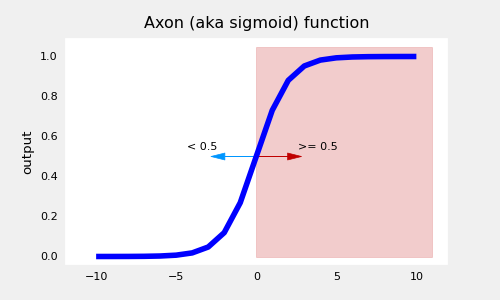

In [5]:
# Adapted from C1_W3_Lab03_Decision_Boundary_Soln.ipynb
# of Andrew Ng's Coursera course

# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)
# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Axon (aka sigmoid) function")
ax.set_ylabel('output')
ax.set_xlabel('')
draw_threshold(ax,0)

# An "artificial" neuron (but with different variable names)

In [6]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) # aka 1 / 1 + e^-x

# 👇 OUR "ARTIFICIAL" NEURON...
input = 0.2 # fmr. called x
weight = 1 # fmr. called m
bias = 0 # # fmr. called b
d_x = weight*input + bias
a_x = sigmoid
output = a_x(d_x)

print(f"Input: {input}")
print(f"Weight: {weight}")
print(f"Bias: {bias}")
print(f"Output: {output}")

Input: 0.2
Weight: 1
Bias: 0
Output: 0.549833997312478


# Let's make a "Cool Number" detector

In [7]:
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0]) # 1 means the number is "cool" / 0 means the number is "wack"
# w_in = np.zeros((1))
# b_in = 0

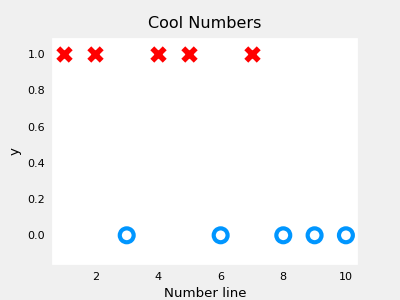

In [8]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_data(x_train, y_train, ax)
plt.show()

In [9]:
# "Cool" numbers: 1,2,4,5,7
# "Wack" numbers: 3,6,8,9,10

input = 10

# LET'S RESET OUR PARAMETERS BACK TO ZERO
weight = 0
bias = 0

g_x = weight*input + bias
f_x = sigmoid
output = f_x(g_x)

print(f"Input: {input}")
print(f"Weight: {weight}")
print(f"Bias: {bias}")
print(f"Output: {output}")

if (output >= 0.5):
  print(f"\nCOOL NUMBER\n")
else:
  print(f"\nWACK NUMBER\n")

Input: 10
Weight: 0
Bias: 0
Output: 0.5

COOL NUMBER



# **Results BEFORE training our neuron**

### Cool Numbers

*1,2,4,5,7 => √,√,√,√,√* - Accuracy: 100% (5/5)

### Wack Numbers

*3,6,8,9,10 => X,X,X,X,X* - Accuracy: 0% (0/5)

### Overall

Accuracy: 50% (5/10)

# Now backpropagation

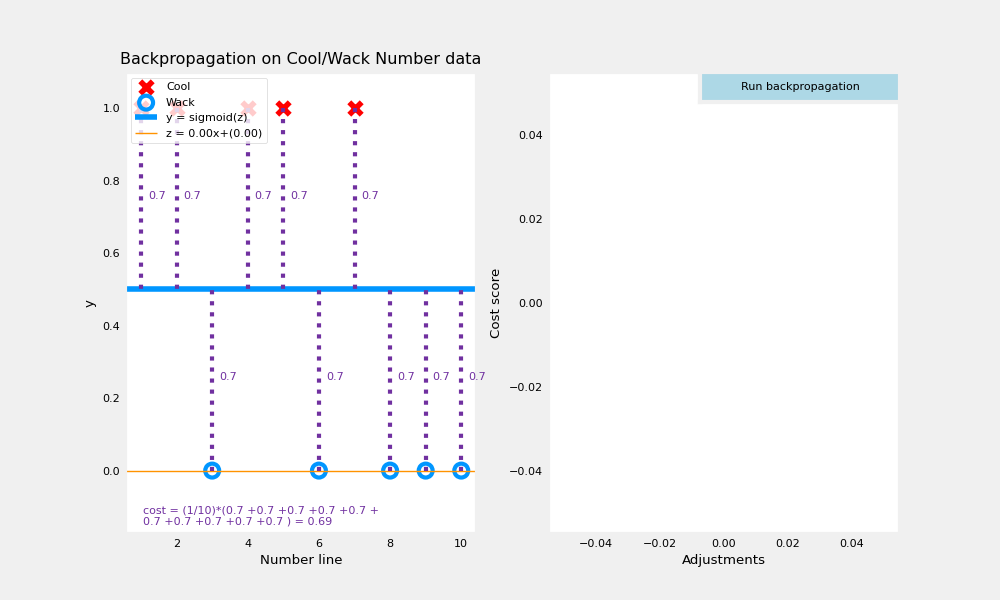

In [10]:
# Adapted from /notebooks/C1_W3_Lab06_Gradient_Descent_Soln.ipynb
# of Andrew Ng's Coursera course

w_range = np.array([-10, 10])
b_range = np.array([-10, 10])
quad = plt_backprop( x_train, y_train, w_range, b_range )

In [11]:
# "Cool" numbers: 1,2,4,5,7
# "Wack" numbers: 3,6,8,9,10

input = 10

# BEFORE
# weight = 0
# bias = 0

# AFTER
weight = -0.54
bias = 2.99

g_x = weight*input + bias
f_x = sigmoid
output = f_x(g_x)

print(f"Input: {input}")
print(f"Weight: {weight}")
print(f"Bias: {bias}")
print(f"Output: {output}")

if (output >= 0.5):
  print(f"\nCOOL NUMBER\n")
else:
  print(f"\nWACK NUMBER\n")

Input: 10
Weight: -0.54
Bias: 2.99
Output: 0.08241331812791279

WACK NUMBER



# **Results AFTER training our neuron**

### Cool Numbers

*1,2,4,5,7 => √,√,√,√,X* - Accuracy: 80% (4/5)

### Wack Numbers

*3,6,8,9,10 => X,√,√,√,√* - Accuracy: 80% (4/5)

### Overall

Accuracy: 80% (8/10)